___
# HW # 7



____

## Problem #1 (5)

Read [this](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) wiki page on multivariate normal distributions. Using Latex, write the probability distribution of a multivariate normal distribution.

\begin{equation}\
\begin{split}
\mathcal{N}  (\mu, \Sigma) = \frac{1}{(2\pi)^{(k/2)} |\Sigma|^{1/2}} \exp \left\{- \frac{1}{2} \left(x-\mu\right)^{T} \Sigma^{-1} \left(x-\mu \right)  \right\}
\end{split}    
\end{equation}

____

## Problem #2 (20)

Imagine you are working for a credit card company, and assigned to detect fraudulent purchases. You are given two columns of data that you believe should be normally distributed, and want to detect any purchase that has a less than .1% chance of occuring for further investigation. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

First we will generate some fake data.

In [35]:
# set a seed so we get the same answer
np.random.seed(12345)

# generate data fake data from a multivariate normal distribution
num_points = 1000
my_mean = [0,0]
my_sigma = [[2,-1],[-1,3]]
print(np.linalg.det(my_sigma))
fake_data = np.random.multivariate_normal(my_mean,my_sigma,num_points).T

5.000000000000001


📝 The determinant is not zero, we can proceed with the above sigma matrix.

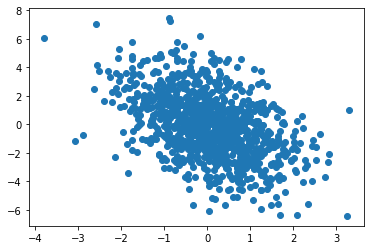

In [14]:
# Lets make a quick plot of the data.
plt.scatter(*fake_data);

In [15]:
# Find the mean of the data using numpy.
mu_x = np.mean(fake_data[0])
mu_y = np.mean(fake_data[1])
# Find the covariance matrix numpy.
sig_xy = np.cov(fake_data[0],fake_data[1])
print(mu_x,mu_y, sig_xy)

0.05828994367596984 -0.06622323065784749 [[ 0.99536108 -1.04358086]
 [-1.04358086  5.11747784]]


Print out the fitted mean and covariance. How do they compare with my_mean and my_sigma above? Do they match? Why do you think this is?

**Answer**

The distribution mean is close to my_mean however the covariance matrix shows  variation in the values. In my opinion, the covariance matrix we created using my_sigma is not positive semidefinite. A multivariate normal gaussian distribution is applicable only when we have a positive semidefinite covariance matrix. Hence if we change value of my_sigma to for eg. [[1,2][2,5]], we will get a gausian normal distribution.

---

In [5]:
# how many points to use in the x,y directions
xlen=100
ylen=100

x_ = np.linspace(-10,10,xlen)
y_ = np.linspace(-10,10,ylen)
xx, yy = np.meshgrid(x_, y_)

Code the equation for the PDF of a multivariate gaussian (from problem 1).

---


In [6]:
def gaussian(x,y,mu,sigma):
  # the x vector from the wiki page is r here.
  r = np.stack([x,y])
  inv_sigma = np.linalg.inv(sigma)
  a = 1/np.sqrt(2*np.pi)*np.sqrt(np.linalg.det(sigma))*np.exp(-((r-mu).T@inv_sigma@(r-mu))/2)

  return a

Fill in the values for z.

---

In [36]:
z = np.zeros((ylen,xlen))
for i in range(ylen):
  for j in range(xlen):
    # place the gaussian values in z
    z[j,i] = gaussian(x=xx[j,i], y = yy[j,i], mu= my_mean, sigma= my_sigma)

Text(0, 0.5, 'Feature 2')

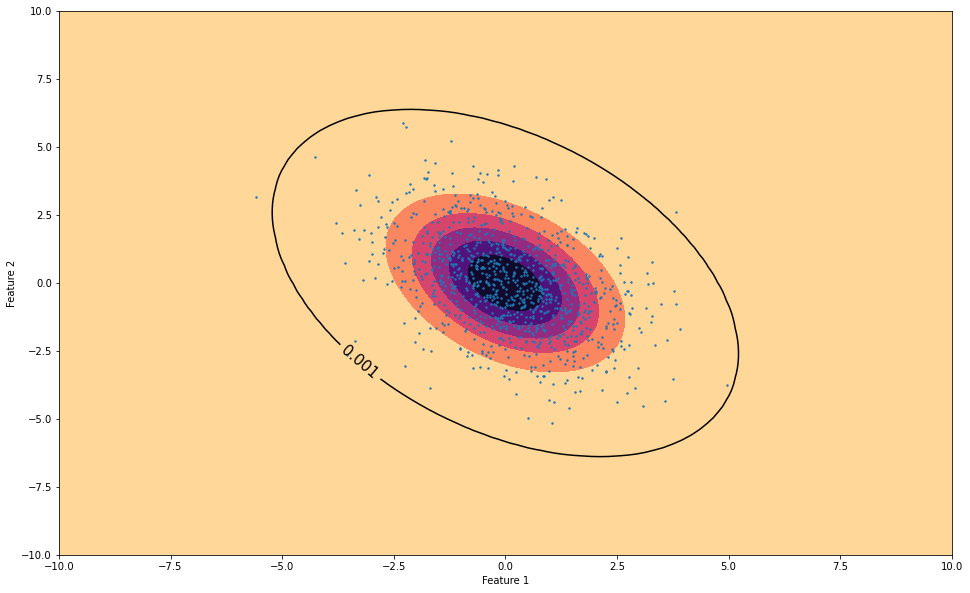

In [37]:
plt.figure(figsize=(16,10))
# create a contour line at .001.
CS = plt.contour(xx,yy,z,levels=[0,.001],cmap='magma_r')
plt.clabel(CS, fontsize=15,colors='black')

# make the filled contour plot here
plt.contourf(xx,yy,z,cmap="magma_r")
plt.scatter(*fake_data,s=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

Are there points that lay outside of the contour? Play with the covariance matrix (my_sigma) and see how it changes the plot you made.

There are very few points that lay outside of the contour plot. When we change values of the covariance matrix-
* When covariance changed to negative value -1, the values rotates about the vertical axis and shows a negative trend 
* When variance is increased or decreased the spread of the points also increases or decreases.

____

## Problem #3 (5)

Read [this](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)) page on bootstrapping.



____

## Problem #3 (20)

We will fit many curves to data in this class, and often get a 'best fit'. The methods we use often do not provide information on how confident or uncertain we are in our fit. Here we will explore one method to create a band of uncertainty around our fit, called bootstrapping. In this problem we will implement an uncertainty band like the one seen in Seaborn's lmplot.



Let's start by generate noisy data on a line.

In [38]:
def line(x,m,b):
  return m*x + b

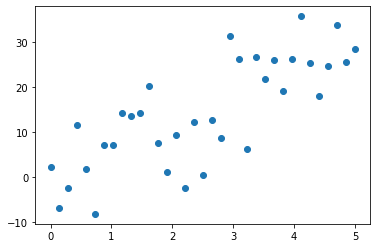

In [58]:
np.random.seed(2525)

# chose a number of points, a slope, and intercept
points = 35
my_m = 6
my_b = 2

x = np.linspace(0,5,points)

# code the equation of a line and add some normal noise to it (use mean 0 and std = 5)
y = line(x,my_m,my_b) + np.random.normal(loc= 0, scale= 7, size= points)

# look at the data
plt.scatter(x,y)

Next we will select the number of lines we want to fit to our data and how many points we will use in each fit. In this case, points are slected with replacement.

In [59]:
# the number of lines to fit
number_of_fits = 100
# the number of points used in each fit
number_of_samples = 5

# set up some arrays to store our fit parameters
fit_ms = np.zeros(number_of_fits)
fit_bs = np.zeros(number_of_fits)


for f in range(number_of_fits):
  
  # select the random points
  random_locs = np.random.choice(range(points),number_of_samples)

  # place data in an X array and y vector
  x_bs = np.stack([np.ones(number_of_samples),x[random_locs]],axis=1)
  y_bs = y[random_locs]
  
  # solve using the normal equation
  fit_bs[f],fit_ms[f] = np.linalg.inv(x_bs.T@x_bs)@(x_bs.T@y_bs)

Now that we have fitted values for $m$ and $b$, we need to generate lines for each combination of parameters. To do this create an array with the size (number_of_fits,len(x)). Then loop through each of the pairs of fitted values and generate the corresponding line, and plot the line using `c='grey'` and `alpha=.3`.

To make the band, find the mean and standard deviation of the lines. Plot the mean, mean+std, mean-std. You can also use `plt.fill_between` to shade the region between the mean-std and mean+std.

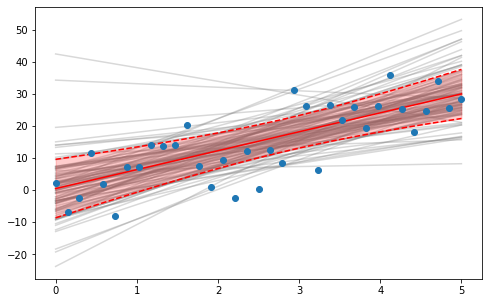

In [60]:
plt.figure(figsize=(8,5))

# create an array to store fits
fit_lines = np.zeros((number_of_fits,len(x)))

# loop through fitted values plot and save line
for i,m,b in zip(range(number_of_fits),fit_ms,fit_bs):
  y_ = line(x,m,b)
  plt.plot(x,y_,c='grey',alpha=.3)
  fit_lines[i] = y_


# plot the original data
plt.scatter(x,y,zorder=12)

# plot the mean of the fitted lines (HINT: you will need to use axis=0 in mean and std functions)
plt.plot(x,np.mean(fit_lines,axis=0),zorder=11,color='red')

# make +- std dashed lines
plt.plot(x,np.mean(fit_lines,axis=0)+np.std(fit_lines,axis=0),zorder=11,color='red',ls='--')
plt.plot(x,np.mean(fit_lines,axis=0)-np.std(fit_lines,axis=0),zorder=11,color='red',ls='--')

# fill in the space between mean+-std
plt.fill_between(x,np.mean(fit_lines,axis=0)+np.std(fit_lines,axis=0),np.mean(fit_lines,axis=0)-np.std(fit_lines,axis=0),color='red',alpha=.2,zorder=11)

How many of the grey lines fall inside the region between the mean line +- the standard deviation line? What shape is the region? Why is the region that shape? Does it make sense for the region to look like it does?

Play with my_m,my_b and the amount of noise you add to the data and see how the fits change.

A vast number of grey lines fall inside the region between the mean line and +- the standard deviation line, the shape of the region is a slanted rectangular patch with varying width across the x axis. The above dotted line represents the mean + standard deviation line and the below dotted line represents the mean - standard deviation. The shape gives us a rough estimate of where our regression line could be and thus is makes sense for the region to look like this.

The width depends on the spread of the data points and the noise added in the data. So, when slope and the intercept are changed, the angle and height of the distribution changes. But, when more noise is added, the width of the region also increases. Which increases our range of mean and standard deviation benchmarkers. 

In short, the more the noise the less confident we get with out predictions, also the lesser the noise the more confidence band shrinks and prdictions become more accurate. 

----

<center>Thank You!
